In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import matplotlib as mpl

Here is an example of geting all ABC3 prototypes.

You can change to your custom list of mp id

In [3]:
abc3 = pd.read_csv("./ternary_anonymous_formulas.csv")

abc3.columns=["mp_id","formula","XYZ"]
abc3 = abc3[abc3['XYZ'].str.match('ABC3')]

In [6]:
tsnedir = "../../dataset/whole_mp_xy/tsne/"
onlyfiles = [join(tsnedir, f) for f in listdir(tsnedir) if isfile(join(tsnedir, f))]
allmp_id = pd.read_csv("../../dataset/all_mp_all_props.csv").mp_id.to_frame()
features={}
for file in onlyfiles:
    decriptor = file.split('/')[-1].split('_')[0]
    print(decriptor)
    allmp_feat   = np.load(file)


    feat_xy = pd.DataFrame(allmp_feat.tolist())
    feat_xy.columns =['x','y']
    feat_xy['mp_id'] = allmp_id
    features[decriptor]=feat_xy

/tmp/ipykernel_834678/3217105207.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  allmp_id = pd.read_csv("../../dataset/all_mp_all_props.csv").mp_id.to_frame()


gatgnn
Ccod0
xrd
topo
comp
pwdm100
Fcod0


This is how we generate Figue 3 (a)-(d) in our paper

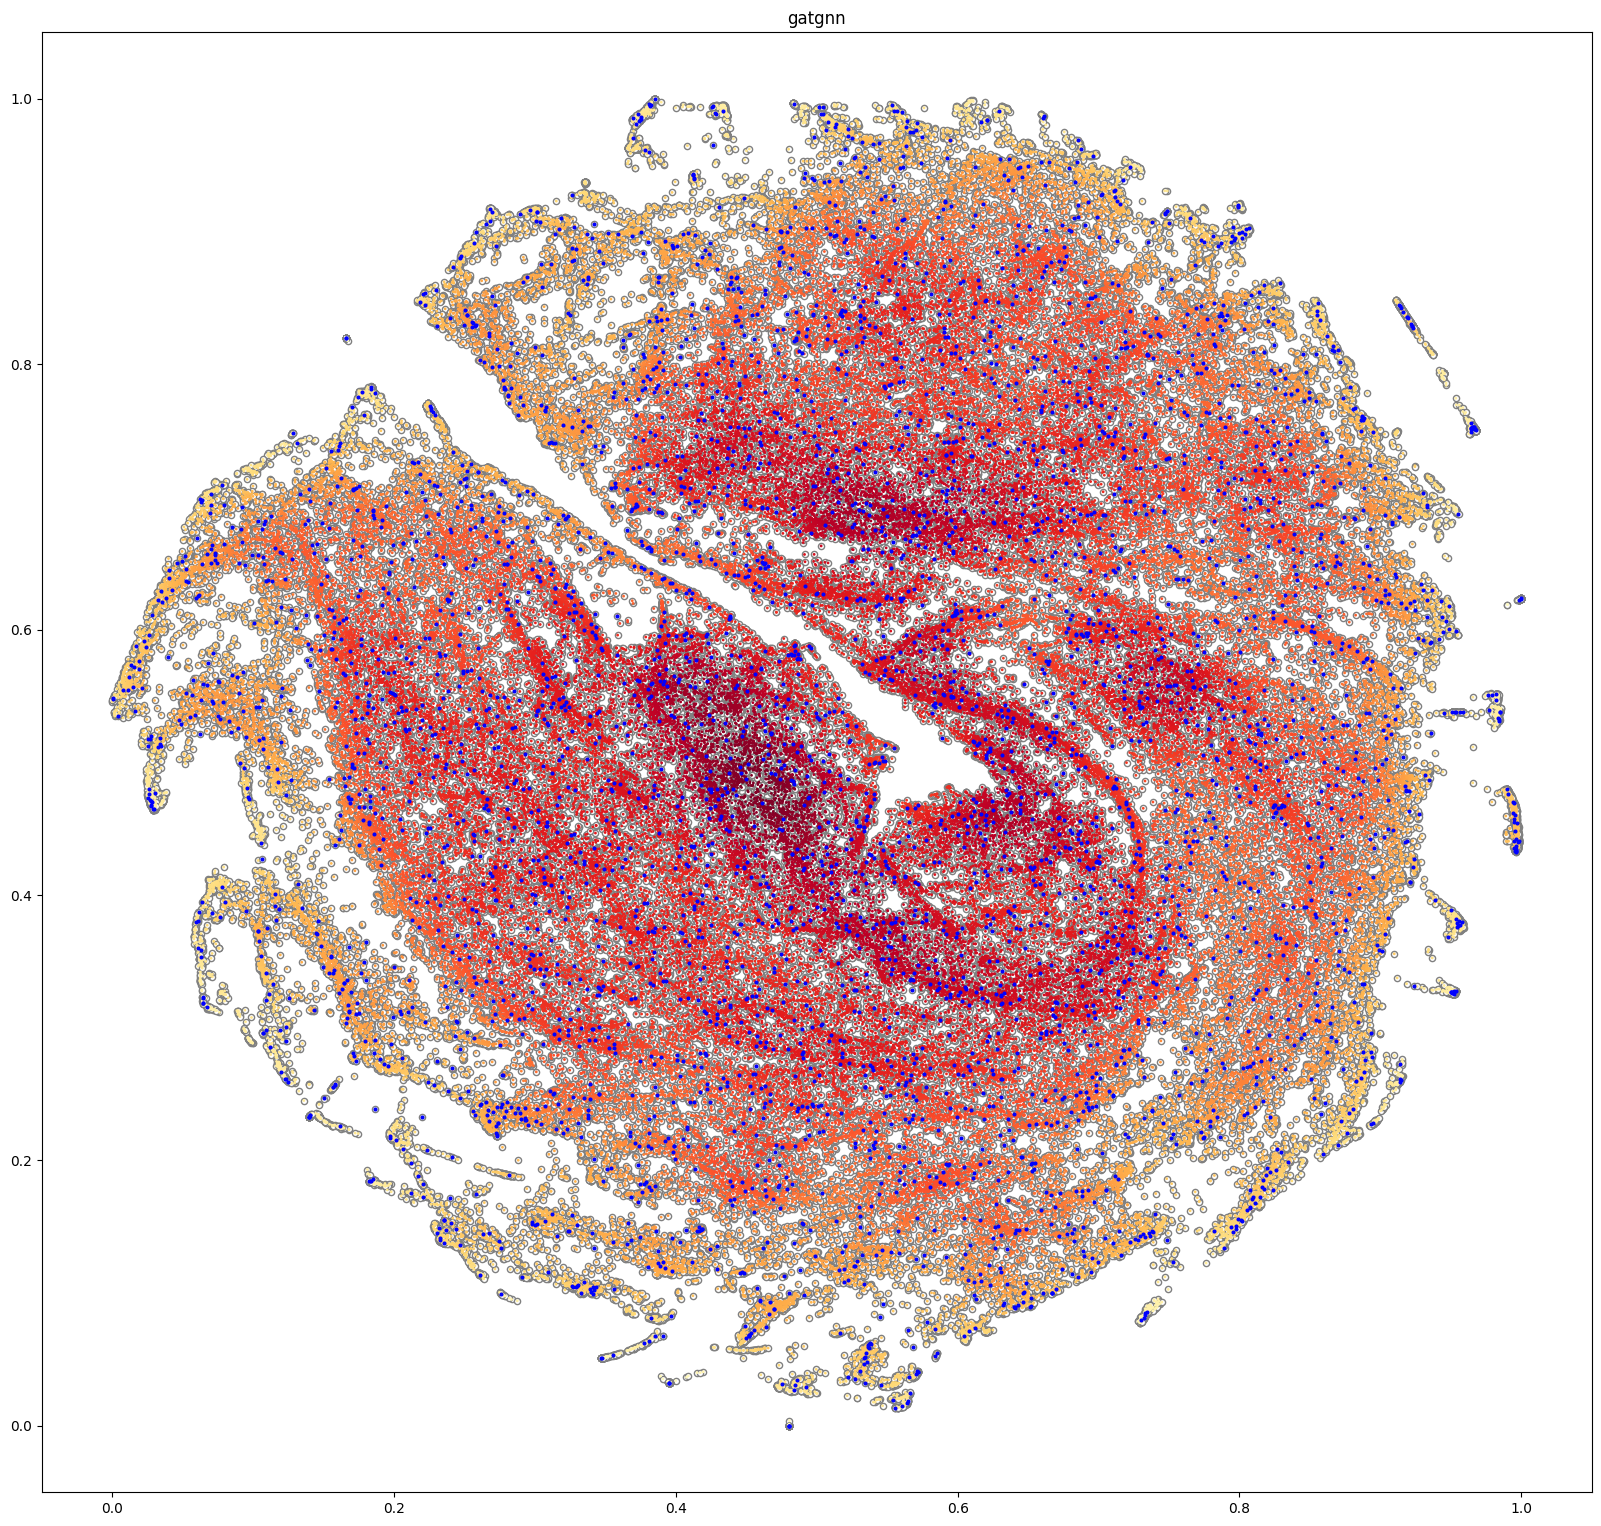

In [7]:
#each graph can take up to 5 mins
for decriptor in features:
    feat_xy = features[decriptor]
    fig = plt.figure(figsize=(20,20),dpi=100)
    ax1 = fig.add_subplot(111)

    x=feat_xy.loc[:]['x']
    y=feat_xy.loc[:]['y']
    plt.scatter(x,y,marker='o',color='white',s=20,zorder=1, edgecolor="grey")  

    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    plt.scatter(x, y, c=z, s=1,zorder=3,cmap=mpl.colormaps['YlOrRd'])


    abc3_xy= pd.merge(right=abc3, 
                left=feat_xy, 
                how='right', 
                right_on='mp_id', 
                left_on='mp_id')


    x=abc3_xy.loc[:]['x']
    y=abc3_xy.loc[:]['y']
    plt.scatter(x,y,marker='.',color='blue',s=20,zorder=4) 
    plt.title(decriptor)
    plt.subplots_adjust(left=None, bottom=0.15, right=None, top=None,
                    wspace=0.1, hspace=0.15)
    plt.xticks()
    plt.show()
    break
#remove break to get all graphs


This is how we generate Figue 3 (e)-(h) in our paper

ValueError: 'c' argument has 136071 elements, which is inconsistent with 'x' and 'y' with size 4358.

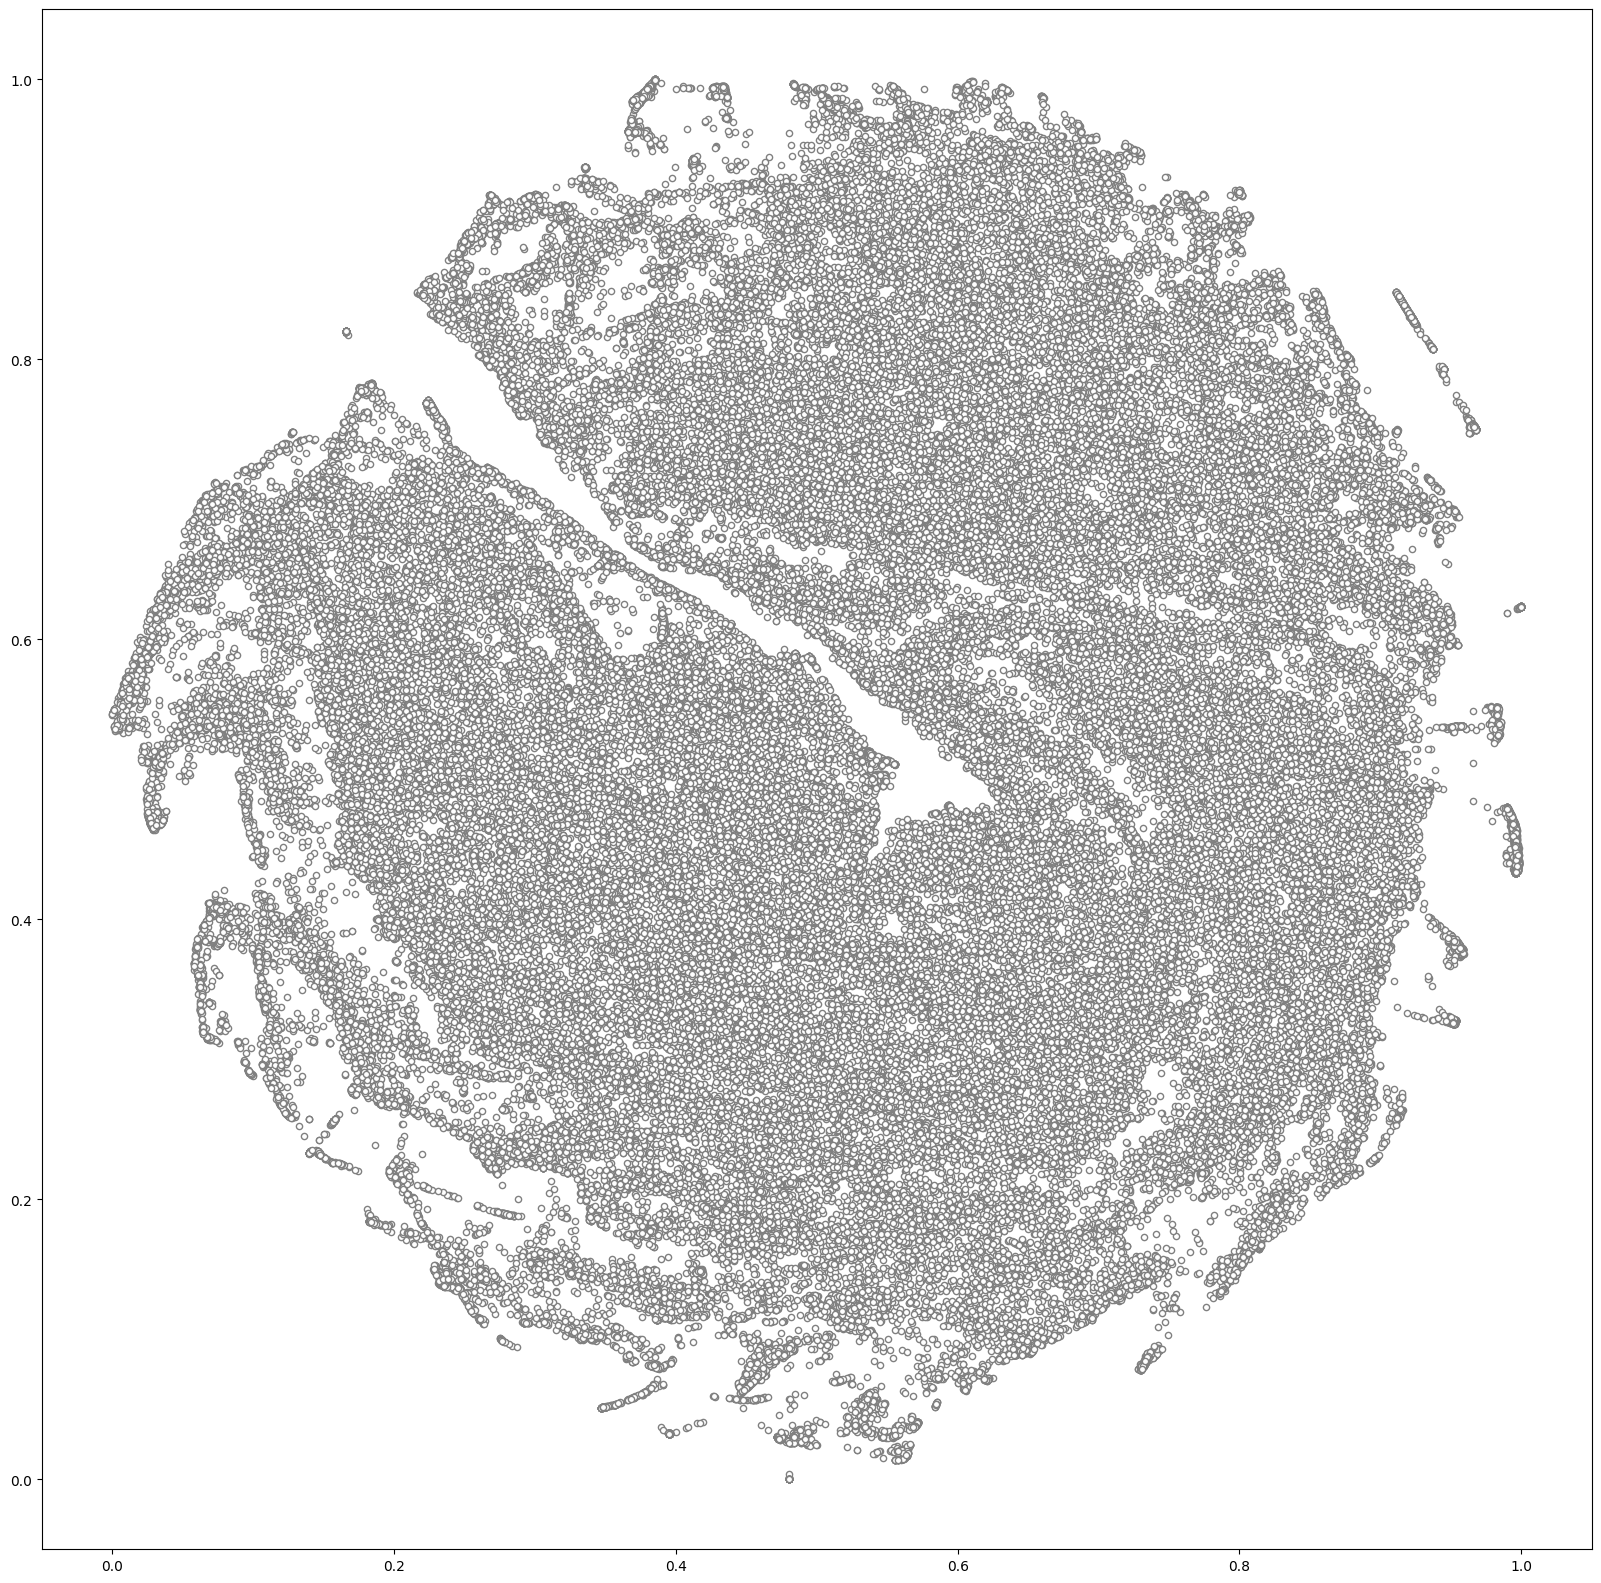

In [8]:
#each graph can take up to 5 mins
for decriptor in features:
    feat_xy = features[decriptor]
    fig = plt.figure(figsize=(20,20),dpi=100)
    ax1 = fig.add_subplot(111)

    x=feat_xy.loc[:]['x']
    y=feat_xy.loc[:]['y']
    plt.scatter(x,y,marker='o',color='white',s=20,zorder=1, edgecolor="grey")  


    abc3_xy= pd.merge(right=abc3, 
                left=feat_xy, 
                how='right', 
                right_on='mp_id', 
                left_on='mp_id')

    x=abc3_xy.loc[:]['x']
    y=abc3_xy.loc[:]['y']
    z = gaussian_kde(xy)(xy)
    plt.scatter(x, y, c=z, s=1,zorder=3,cmap=mpl.colormaps['YlOrRd'])
    
    plt.title(decriptor)
    plt.subplots_adjust(left=None, bottom=0.15, right=None, top=None,
                    wspace=0.1, hspace=0.15)
    plt.xticks()
    plt.show()
    break
#remove break to get all graph